**Note: The tools used in this notebook are outdated. Though they are still available for use, we recommend you reference the ppp_codebkg_000_datainterfacing notebook to see the updated tools.**

Here we explain the data model for the primary <a href="http://www-public.slac.stanford.edu/babar/">BaBar FIX THIS LINS!!!!!</a> datasets used in many of these activities.

This activity focuses mostly on accessing the data, not explaining the physics, though some helpful links are provided in the discussion.

First we import some standard python libraries, as well as the helper code, <b><tt>babar_tools</tt></b>.

In [1]:
import numpy as np

import matplotlib.pylab as plt
%matplotlib notebook
# Uncomment the following line if you want your plots to be displayed in a separate interactive window.
#%matplotlib qt 

import sys
sys.path.append("../tools/")

#from draw_objects3D import *
import babar_tools as babar

Next, we will open the file and pull out the collision data. This will return a Python <a href="https://docs.python.org/2/tutorial/datastructures.html">list</a> of all the collisions in that file.

In [2]:
infile = open('../data/small_BaBar_test_file.dat')
collisions = babar.get_collisions(infile)

number_of_collisions = len(collisions)
print("# of electron-positron collisions: %d" % (number_of_collisions))

# of electron-positron collisions: 926


Let's take a look at the first collision by looking at the first entry in the list of collisions.

In [3]:
print(collisions[0])

[[[0.6856, 0.3399, -0.1274, 0.5646, 1, 0.9673, 457.0], [0.2914, -0.0868, 0.2403, 0.0125, -1, 1.022, 541.0], [1.2231, -1.1931, 0.2289, -0.0256, 1, 0.9894, 552.0], [0.6188, -0.1493, 0.3117, -0.494, -1, 0.9562, 478.0], [0.2723, 0.1194, -0.0667, 0.1897, 1, 0.6784, 509.0], [0.1993, 0.1221, -0.0209, 0.0699, -1, 0.6784, 0.0], [0.2622, 0.011, 0.2031, -0.0889, -1, 0.6784, 528.0]], [[0.7446, -0.2891, 0.3221, -0.3513, 1, 0.6784, 840.0]], [], [], [], []]


We see that this entry is a list of other lists! How many of these other lists are there?

In [4]:
print(len(collisions[0]))

6


What are these 6 entries? Each of them contains information about different particles and other physics quantities that you would want to analyze in any given proton-proton collision.

These entries contain information about (in order):
* <a href="http://en.wikipedia.org/wiki/Pion">pions</a>
* <a href="http://en.wikipedia.org/wiki/Kaon">kaons</a>
* <a href="http://en.wikipedia.org/wiki/Proton">protons</a>
* <a href="http://en.wikipedia.org/wiki/Muon">muons</a>
* <a href="http://en.wikipedia.org/wiki/Electron">electrons</a>
* <a href="http://en.wikipedia.org/wiki/Photon">photons</a> 

Each of these 6 entries is a list containting, for example, the information about each pion in the event. A particular collision will most likely have a different number of pion than the previous collision, so you need to be aware of this when you write your code.

In [5]:
print("# of pions:     %d" % (len(collisions[0][0])))
print("# of kaons:     %d" % (len(collisions[0][1])))
print("# of protons:   %d" % (len(collisions[0][2])))
print("# of muons:     %d" % (len(collisions[0][3])))
print("# of electrons: %d" % (len(collisions[0][4])))
print("# of photons:   %d" % (len(collisions[0][5])))

# of pions:     7
# of kaons:     1
# of protons:   0
# of muons:     0
# of electrons: 0
# of photons:   0


It's easiest to access these quantities by making use of Python's syntax in accessing multiple entries of a list in one line.

In [6]:
pions,kaons,protons,muons,electrons,photons = collisions[0]

Let's look at the information for each of these quantities. The first 5 entries are all charged particles and contain the same type of information. 

## Pions, kaons, protons, muons, electrons

In [7]:
E,px,py,pz,charge,beta,dedx = pions[0]
print("E:       %8.4f" % (E))
print("px:      %8.4f" % (px))
print("py:      %8.4f" % (py))
print("pz:      %8.4f" % (pz))
print("charge:  %8d" % (charge))
print("beta:    %8.4f" % (beta))
print("dedx:    %8.4f" % (dedx))

E:         0.6856
px:        0.3399
py:       -0.1274
pz:        0.5646
charge:         1
beta:      0.9673
dedx:    457.0000


Those first 4 entries refer to the energy and Cartesian-components of the momentum of the jet. Collectively, this is referred to as the <a href="http://en.wikipedia.org/wiki/Four-momentum">four-momentum</a> (or four-vector) and it is the bread-and-butter of most of the analyses. 

The 5th entry is the electric charge.

The 6th entry, $\beta$, is the speed of the particle (as measured by the DIRC Cherenkov detector LINK STUFF HERE!!!!! divided by the speed of light. 
$$\beta = \frac{v}{c}$$

The 7th entry is $\frac{dE}{dx}$. The amount of energy lost per linear distance traveled through some material (WHICH MATERIAL??? DCH???? The units are abitrary, but can be used to compare between particles. 

## Photons

In [8]:
########## NEED TO GET PHOTONS IN THE DATA STREAM ##########

#E,px,py,pz = photons[0]
#print("E:  %8.4f" % (E))
#print("px: %8.4f" % (px))
#print("py: %8.4f" % (py))
#print("pz: %8.4f" % (pz))

Photons are electrically neutral, so the only 4 entries are the components of the four-momentum.

## Sample skeleton code

Here is a snippet of code that loops over some data and plots the number of pions, the energy of the pions, and the energy of the kaons for each event.

<IPython.core.display.Javascript object>


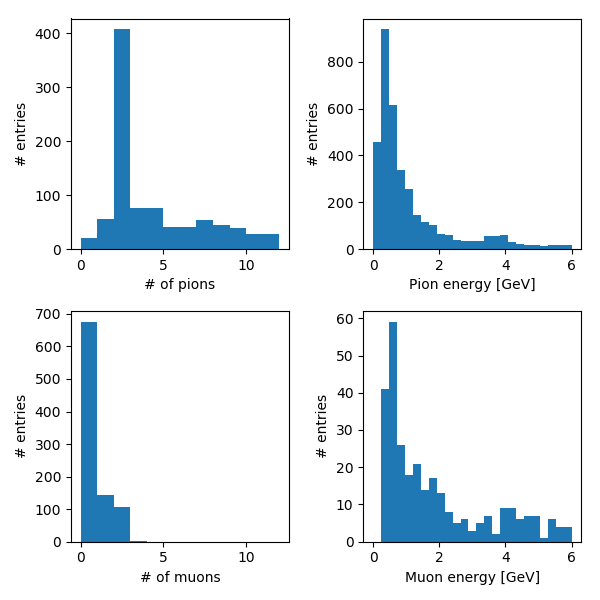

In [9]:
infile = open('../data/small_BaBar_test_file.dat')
collisions = babar.get_collisions(infile)

# We will use these to store the quantities that we will be plotting later.
npions = []
nmuons = []
pions_E = []
muons_E = []

for collision in collisions:
    
    pions,kaons,protons,muons,electrons,photons = collision
    
    npions.append(len(pions))
    nmuons.append(len(muons))
    
    for pion in pions:
        E,px,py,pz,q = pion[0:5]
        pions_E.append(E)
        
    for muon in muons:
        E,px,py,pz,q = muon[0:5]
        muons_E.append(E)
        
# Plot the quantities
plt.figure(figsize=(6,6))

plt.subplot(2,2,1)
plt.hist(npions,bins=12,range=(0,12))
plt.xlabel(r'# of pions')
plt.ylabel('# entries')

plt.subplot(2,2,2)
plt.hist(pions_E,bins=25,range=(0,6))
plt.xlabel(r'Pion energy [GeV]')
plt.ylabel('# entries')

plt.subplot(2,2,3)
plt.hist(nmuons,bins=12,range=(0,12))
plt.xlabel(r'# of muons')
plt.ylabel('# entries')

plt.subplot(2,2,4)
plt.hist(muons_E,bins=25,range=(0,6))
plt.xlabel(r'Muon energy [GeV]')
plt.ylabel('# entries')

plt.tight_layout()